In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import seaborn as sns
sns.set(style="darkgrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df=pd.read_csv('/content/drive/MyDrive/Shahanas files/brain_stroke.csv')
df=pd.read_csv('/content/sample_data/brain_stroke (1).csv')

**1.Data Preprocessing**

In [ ]:
#visualizing data
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
#checking for total null/missing values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<ipython-input-4-7a04f0574790>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


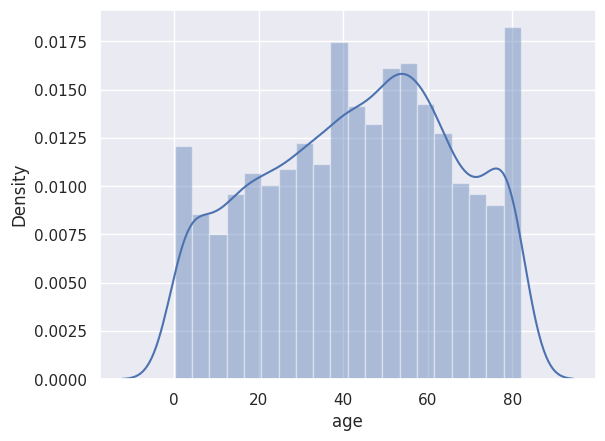

<ipython-input-4-7a04f0574790>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


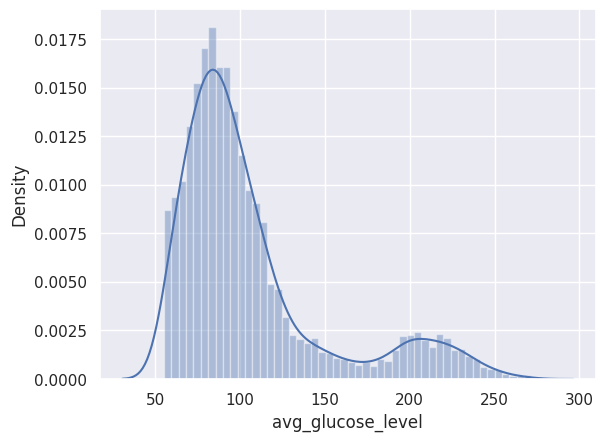

<ipython-input-4-7a04f0574790>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


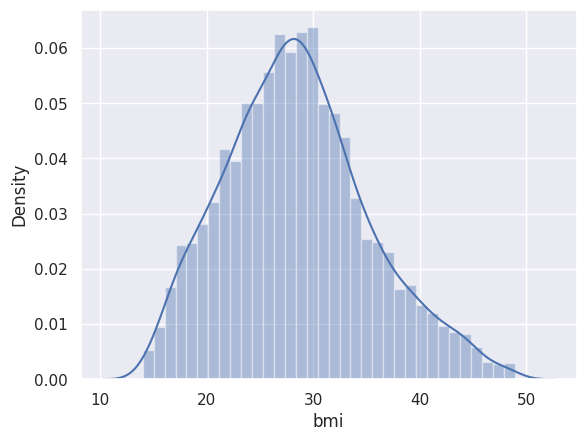

In [ ]:
#checking for outliers
# visualizing data
# Plot scatter plots for numeric columns
numeric_columns = ['age', 'avg_glucose_level', 'bmi']

# Visualize scatterplots for each numeric column separately
for column in numeric_columns:
    # Create a figure and axis for the plot

    # Plot the distribution plot for the current numeric column
    sns.distplot(df[column])

    # Show the plot
    plt.show()

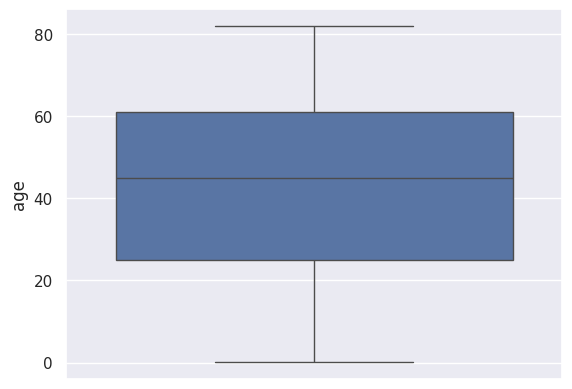

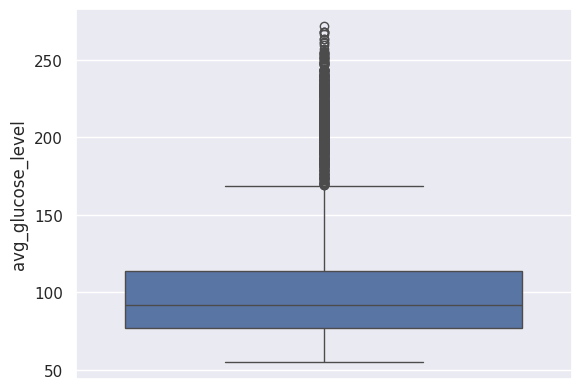

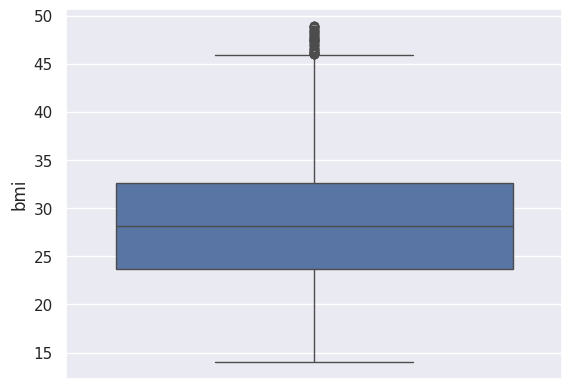

In [ ]:
#checking for outliers in boxplot
numeric_columns = ['age', 'avg_glucose_level', 'bmi']

# Visualize scatterplots for each numeric column separately
for column in numeric_columns:
    # Create a figure and axis for the plot

    # Plot the distribution plot for the current numeric column
    sns.boxplot(df[column])

    # Show the plot
    plt.show()

      gender   age  hypertension  heart_disease ever_married work_type  \
1       Male  80.0             0              1          Yes   Private   
5       Male  74.0             1              1          Yes   Private   
6     Female  69.0             0              0           No   Private   
7     Female  78.0             0              0          Yes   Private   
8     Female  81.0             1              0          Yes   Private   
...      ...   ...           ...            ...          ...       ...   
4974    Male  58.0             0              0          Yes  Govt_job   
4976    Male  41.0             0              0           No   Private   
4978  Female  45.0             1              0          Yes  Govt_job   
4979    Male  40.0             0              0          Yes   Private   
4980  Female  80.0             1              0          Yes   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
1             Rural             105.92 

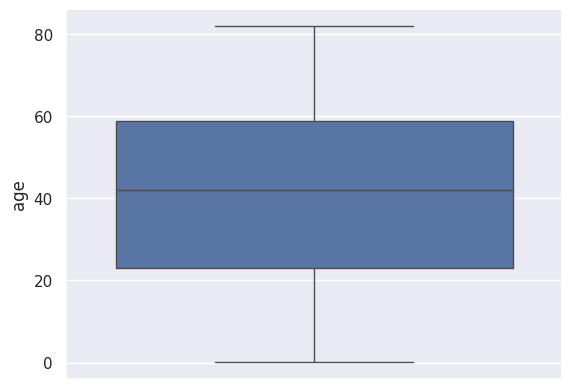

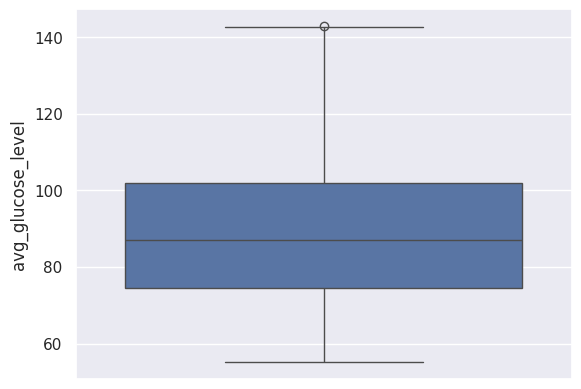

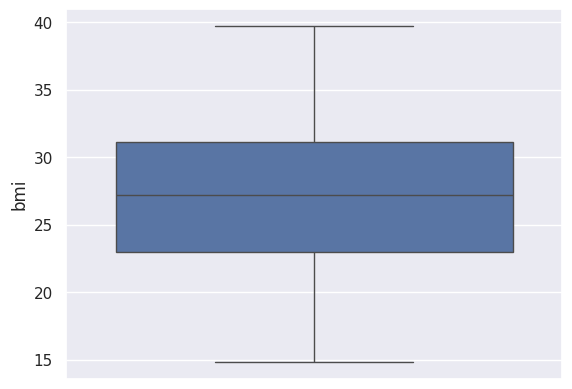

In [ ]:
#Handling Outliers
# Calculate quartiles
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 0.80 * IQR

# Identify outliers
outliers = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)

# Remove outliers
cleaned_df = df[~outliers]
original_data=df
df=cleaned_df
# Show the cleaned DataFrame
print(cleaned_df)
numeric_columns = ['age', 'avg_glucose_level', 'bmi']

# Visualize scatterplots for each numeric column separately
for column in numeric_columns:
    # Create a figure and axis for the plot

    # Plot the distribution plot for the current numeric column
    sns.boxplot(cleaned_df[column])

    # Show the plot
    plt.show()

In [ ]:
target = 'stroke'
X = df.loc[:,df.columns!=target]
y = df.loc[:,df.columns==target]

In [ ]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
X = pd.get_dummies(X[columns])

0    3812
1     152
Name: stroke, dtype: int64


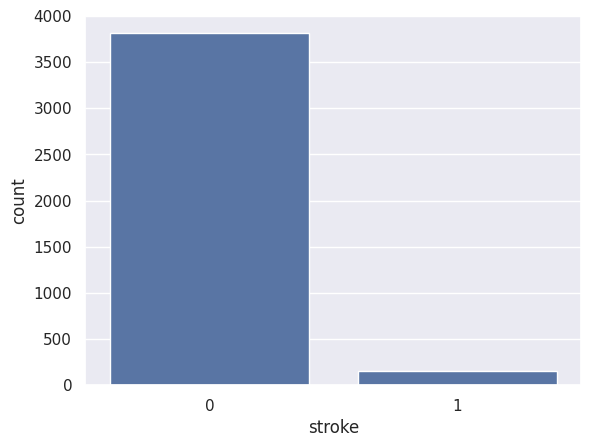

In [ ]:
ax = sns.countplot(x=target,data=df)
print(df[target].value_counts())

In [ ]:
#There is an oversampling in the dataset. Huge difference between those who do not have a stroke and those who do.

percentage_no_stroke = 100*(3812/float(df.shape[0]))
percentage_no_stroke

96.16548940464178

In [ ]:
percentage_yes_stroke = 100*(152/float(df.shape[0]))
percentage_yes_stroke

3.834510595358224

**>>Applying SMOTE technique for handling imbalance data**

In [ ]:
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

1    3812
0    3812
Name: stroke, dtype: int64


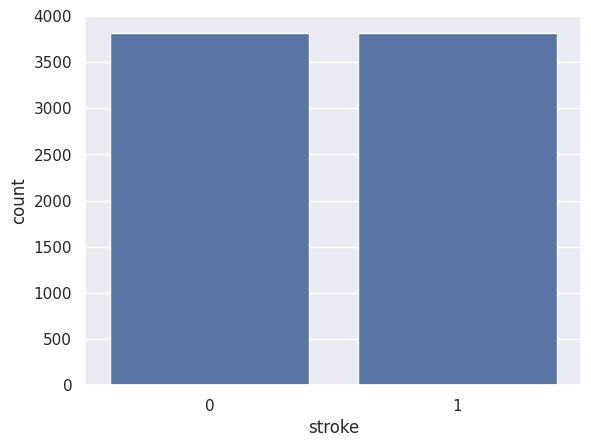

In [ ]:
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

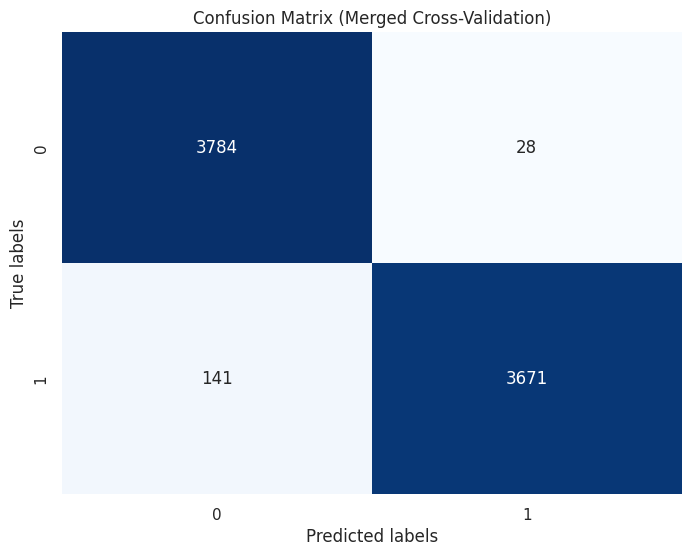

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

# Define the random forest model
random_forest_en = RandomForestClassifier(n_estimators=250, n_jobs=-1)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Create a ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform the data
X_encoded = preprocessor.fit_transform(X)

y_pred_cv = cross_val_predict(random_forest_en, X_encoded, y.values.ravel(), cv=5)

# Generate confusion matrix
conf_matrix = confusion_matrix(y, y_pred_cv)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Merged Cross-Validation)')
plt.show()

In [ ]:
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]

accuracy = (true_positives + conf_matrix[0, 0]) / np.sum(conf_matrix)

precision = true_positives / (true_positives + false_positives)

recall = true_positives / (true_positives + false_negatives)

f1 = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9778331584470095
Precision: 0.9924303865909705
Recall: 0.9630115424973767
F1 Score: 0.9774996671548396
